In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [7]:
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import librosa
from matplotlib.animation import FuncAnimation

In [3]:
filename='20170622-14-15-46-112_001jun_Successivo(sotto)_1.csv'
data=pd.read_csv(filename)

# convert timestemps in second
data.timestamp=data.apply(lambda x: x.timestamp*1e-6,axis=1)

# add speed
data['speed']=np.sqrt(data.VX**2+data.VY**2)

In [4]:
last_time=data.iloc[-1].timestamp
windows_shift=0.01
n_fft=512
n_frames=math.ceil(last_time/windows_shift)
print('Number of frames = ',n_frames)
times=[windows_shift*i for i in range(n_frames)]
indices=[i for i in range(n_frames-1)]
data['frame_index']=pd.cut(data['timestamp'],times,labels=indices,include_lowest=True)

Number of frames =  663


In [5]:
frames=data.groupby('frame_index',observed=True)
non_empty_frames=[k for k in frames.indices]

8


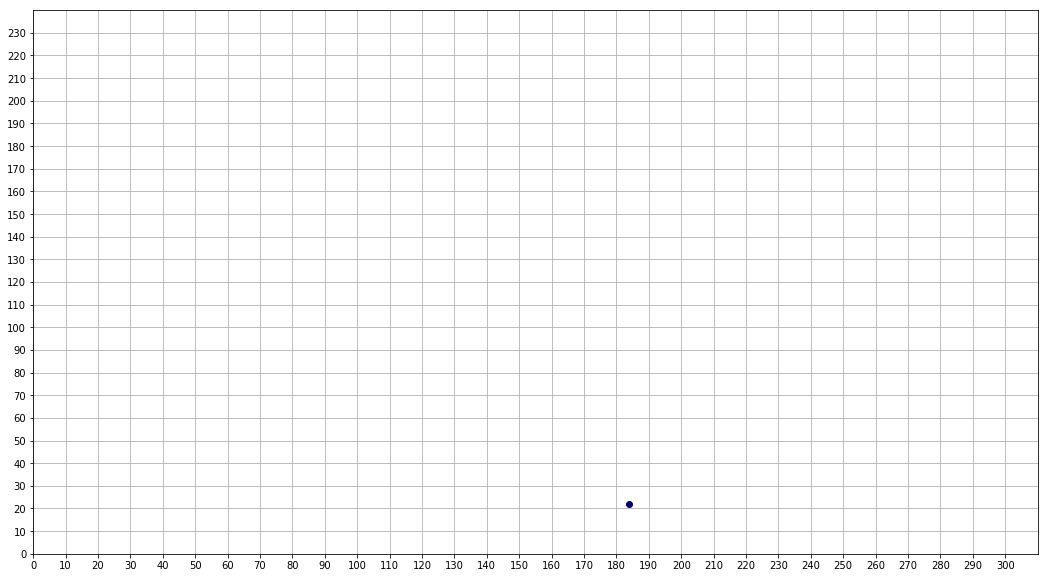

In [17]:
fig ,ax = plt.subplots(figsize=(18,10))

xmax=310
ymax=240

x_ticks=[i for i in range(0,xmax,10)]
y_ticks=[i for i in range(0,ymax,10)]

ax.set_xticks(ticks=x_ticks)
ax.set_yticks(ticks=y_ticks)

#plt.colorbar()
ax.grid()
ax.set_xlim(0,xmax)
ax.set_ylim(0,ymax)
    

def print_single_frame(frame_index):
    print(frame_index)
    x=frames.get_group(frame_index)['X']
    y=frames.get_group(frame_index)['Y']
    speed=frames.get_group(frame_index)['speed']
    
    ax.scatter(x.values,y.values,c=speed.values,cmap='jet')

ani = FuncAnimation(fig, print_single_frame, frames=non_empty_frames)